# Prueba técnica
Para el desarrollo de la prueba es necesario cargar las siguientes bibliotecas (librerias):
- Numpy
- Pandas
- Matplot

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Teniendo las bibliotecas cargadas se procede a cargar la data cruda ubicada en el archivo acelero.txt

In [6]:
df_acelero = pd.read_csv("./acelero.txt")
print(df_acelero)

         Tiempo  Posición  Temperatura
0    1695686400 -7.501667    32.524667
1    1695690000 -7.505167    32.528167
2    1695693600 -7.504500    32.522000
3    1695697200 -7.500500    32.517833
4    1695700800 -7.504167    32.531667
..          ...       ...          ...
692  1698177600 -7.409583    31.729000
693  1698181200 -7.400417    31.721833
694  1698184800 -7.398083    31.721833
695  1698188400 -7.401083    31.716833
696  1698192000 -7.420000    31.720000

[697 rows x 3 columns]


Para una mejor visualización al momento del análisis se convierten los datos de tiempo a fecha (año-mes-día) en una nueva columna llamada "Fecha"

In [7]:
df_acelero["Fecha"] = pd.to_datetime(df_acelero["Tiempo"], unit="s")
print(df_acelero)

         Tiempo  Posición  Temperatura               Fecha
0    1695686400 -7.501667    32.524667 2023-09-26 00:00:00
1    1695690000 -7.505167    32.528167 2023-09-26 01:00:00
2    1695693600 -7.504500    32.522000 2023-09-26 02:00:00
3    1695697200 -7.500500    32.517833 2023-09-26 03:00:00
4    1695700800 -7.504167    32.531667 2023-09-26 04:00:00
..          ...       ...          ...                 ...
692  1698177600 -7.409583    31.729000 2023-10-24 20:00:00
693  1698181200 -7.400417    31.721833 2023-10-24 21:00:00
694  1698184800 -7.398083    31.721833 2023-10-24 22:00:00
695  1698188400 -7.401083    31.716833 2023-10-24 23:00:00
696  1698192000 -7.420000    31.720000 2023-10-25 00:00:00

[697 rows x 4 columns]


Ya con la base de datos cargada y editada se procede a realizar los ejercicios de la prueba

## Punto 1: Análisis de Señales y Series de tiempo

### 1. Grafica la señal (Tiempo en el eje X, Valor en el eje Y).

Para esto se realiza un gráfico de dispersión de Tiempo (en este caso representado por "Fecha") vs Posición

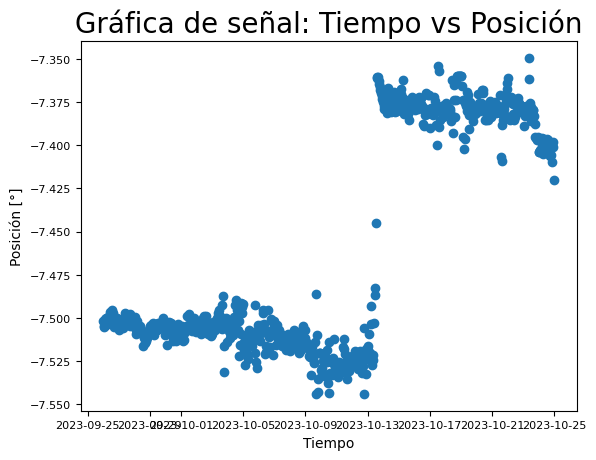

In [8]:
plt.scatter(df_acelero["Fecha"], df_acelero["Posición"])
plt.title("Gráfica de señal: Tiempo vs Posición", fontsize=20)
plt.xlabel("Tiempo")
plt.ylabel("Posición [°]")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()